# Station characterisation
We could try to classify different stations to leisure / work traffic. 

A leisure station would be a station which as compared to the other stations high traffic on weekend days, while having lower traffic on weekdays.

This assumes that on weekends people do not work, which is mostly the case.

The goal is to classify the different station as leisure / utilatarian or mixed.

In [1]:
from data_io.loader.data_loader import DataLoader
import polars as pl
import numpy as np

dl = DataLoader()
station = "Plöck"

Daily mean count $\bar{C}_{24h}$: Sum of daily ```channels_out``` / number of days

In [2]:
from analysis.visualization.characterisation.indices import daily_mean_count

daily_mean_count(loader=dl, station_name=station)

4167.55800775425

How large is the hourly mean count for a station? (f.ex. 0h: 24, 1h: 20, 2h: 18, ...)

Calculating Hourly mean: Sum of counts per hour / 24 hours and normalizing over overall daily mean $\bar{C}_{24h}$ to make stations comparable. 

Therefore:
$$
\begin{align*}
I_{h} = \frac{\bar{C}_{1h}}{\bar{C}_{24h}}
\end{align*}
$$

One would assume we get a general trend that later at night we get low counts, morning mid-day we get high counts. 

In [3]:
from analysis.visualization.characterisation.indices import hourly_index

hourly_index(loader=dl, station_name=station)

hour,mean_C_1h,I_h
i8,f64,f64
0,19.627098,0.004709
1,12.916767,0.003099
2,8.23674,0.001976
3,7.469565,0.001792
4,17.485603,0.004196
…,…,…
19,159.473495,0.038265
20,130.726101,0.031368
21,99.647526,0.02391


How large is the daily mean count for a station? (f.ex. 1st: 246, 2nd: 223, 3rd: 201, ...)

Calculating Daily mean: Sum of counts per day / 24 hours and normalizing over overall daily mean $\bar{C}_{24h}$ to make stations comparable.

Therefore:
$$
\begin{align*}
I_{d} = \frac{\bar{C}_{1d}}{\bar{C}_{24h}}
\end{align*}
$$

In [4]:
from analysis.visualization.characterisation.indices import daily_index

daily_index(loader=dl, station_name=station)

weekday,mean_C_1d,I_d
i8,f64,f64
1,4488.417537,1.07699
2,4886.343096,1.172472
3,4865.460417,1.167461
4,4825.135699,1.157785
5,4372.377358,1.049146
6,3544.770355,0.850563
7,2199.517672,0.527771


How large is the monthly mean count for a station? (f.ex. January: 2463, February: 2231, ...)

Calculating Monthly mean: Sum of counts per month / 30 days and normalizing over overall daily mean $\bar{C}_{24h}$ to make stations comparable. 

Therefore:
$$
\begin{align*}
I_{m} = \frac{\bar{C}_{30d}}{\bar{C}_{24h}}
\end{align*}
$$

In [5]:
from analysis.visualization.characterisation.indices import monthly_index

monthly_index(loader=dl, station_name=station)

month,mean_C_1d,I_m
i8,f64,f64
1,3396.226667,0.81492
2,3557.789272,0.853687
3,3318.639576,0.796303
4,4076.510274,0.978153
5,4739.494624,1.137235
…,…,…
8,3672.856631,0.881297
9,3844.618519,0.922511
10,4522.753571,1.085229


DPI 0.02970483522051482
Diff 0.08028297828196998


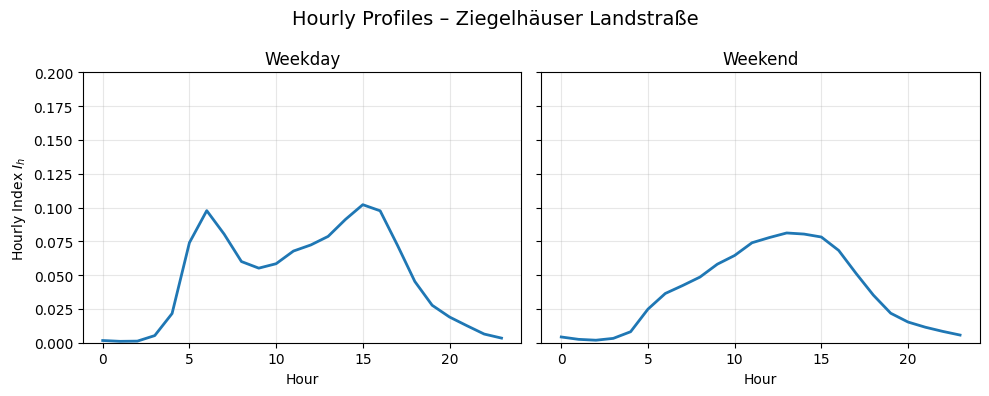

DPI 0.03311982642734115
Diff 0.07802836030933115


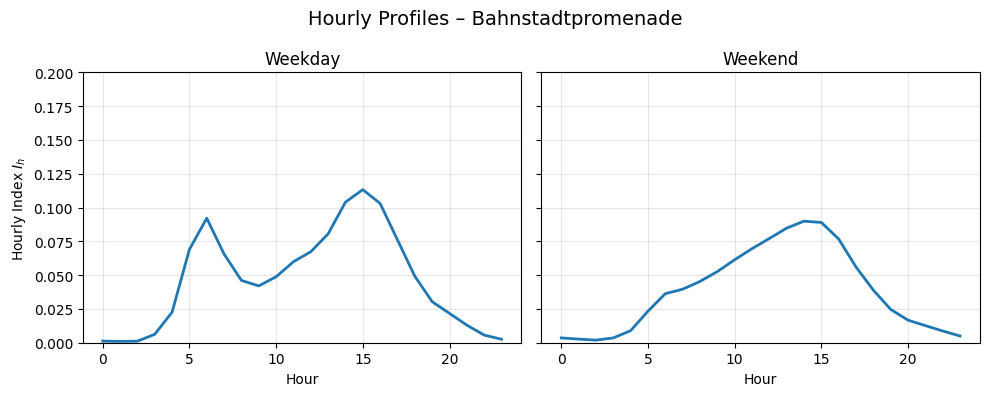

DPI 0.008953088824928611
Diff 0.05720296323267686


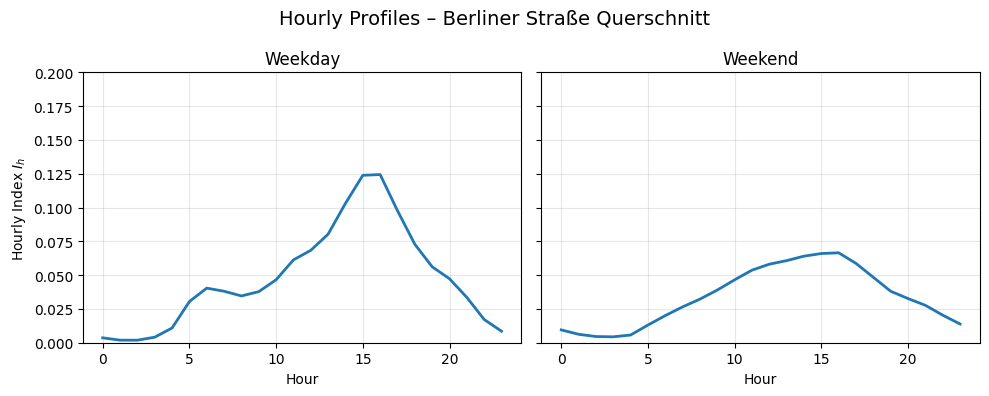

DPI 0.02362735597537766
Diff 0.058061892890711245


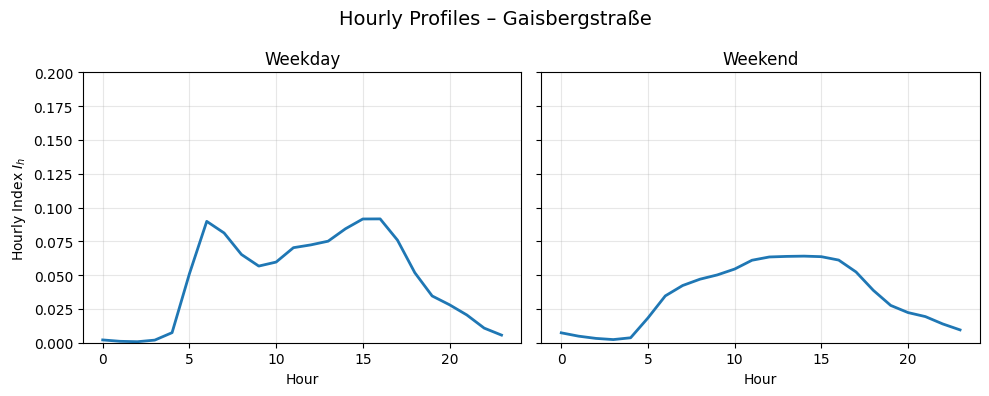

DPI 0.0127229543178115
Diff 0.05375968257451252


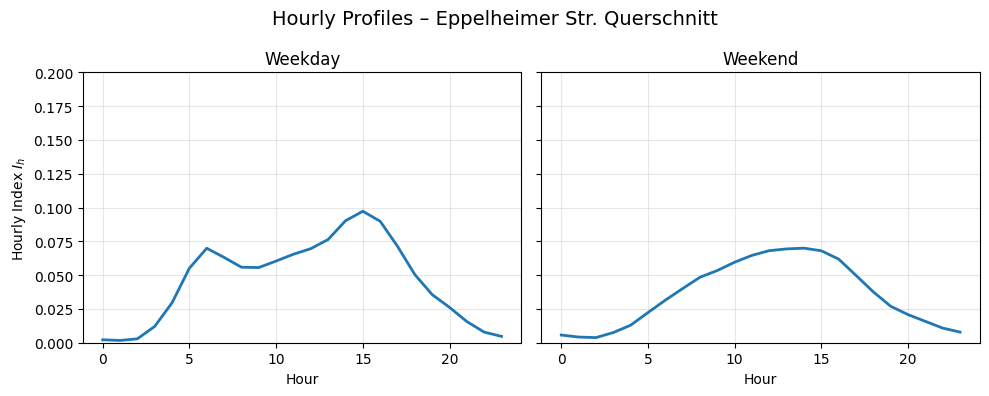

DPI 0.0039398535154902105
Diff 0.03451367844537799


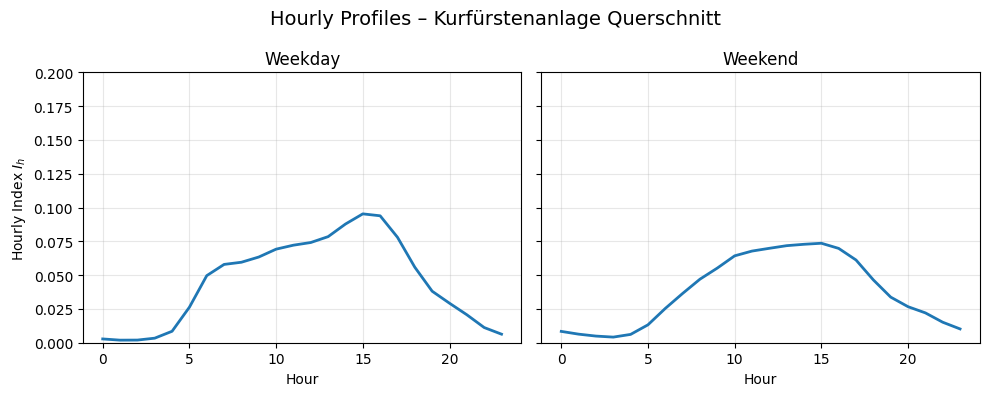

DPI 0.0037781202019900205
Diff 0.03128005066819706


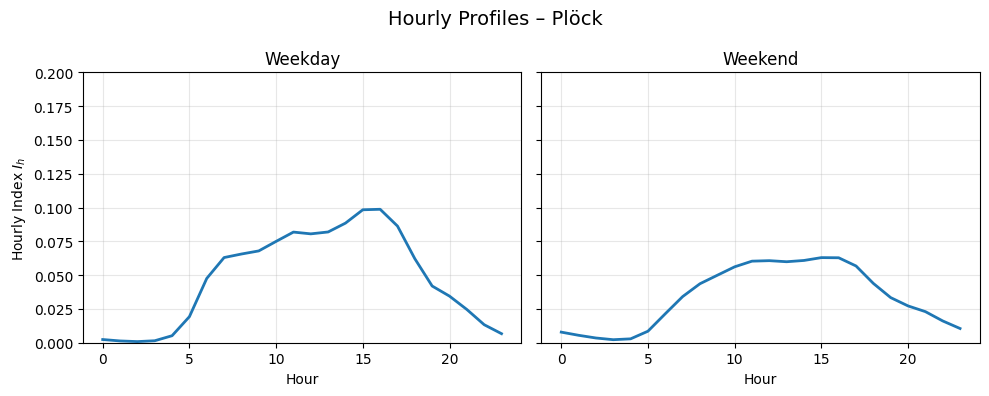

DPI 0.01525037458765514
Diff 0.06651243849270456


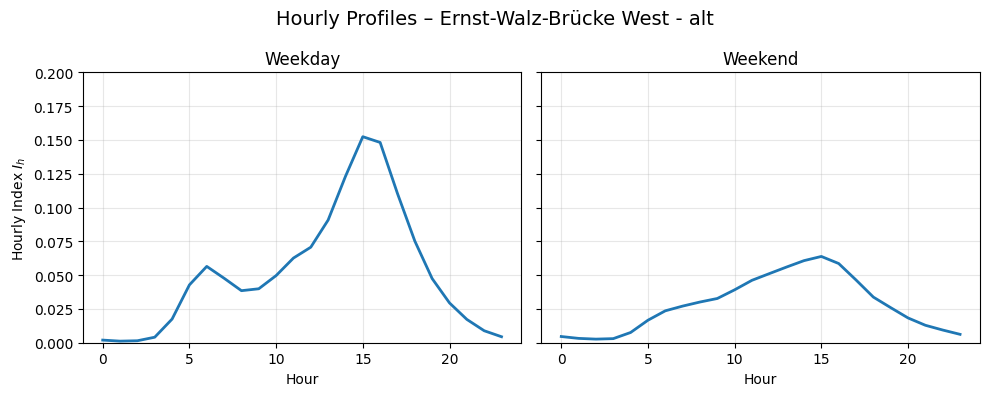

DPI 0.021422203245669295
Diff 0.06051176933529471


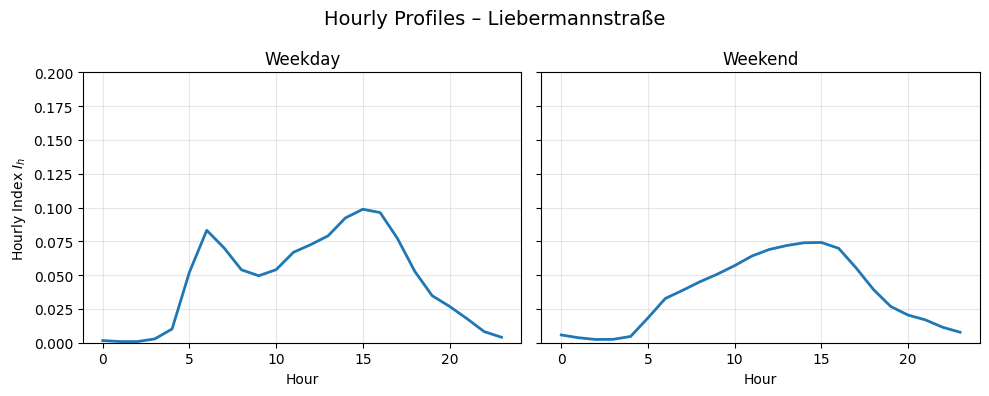

DPI 0.029491451401865317
Diff 0.08531284227744704


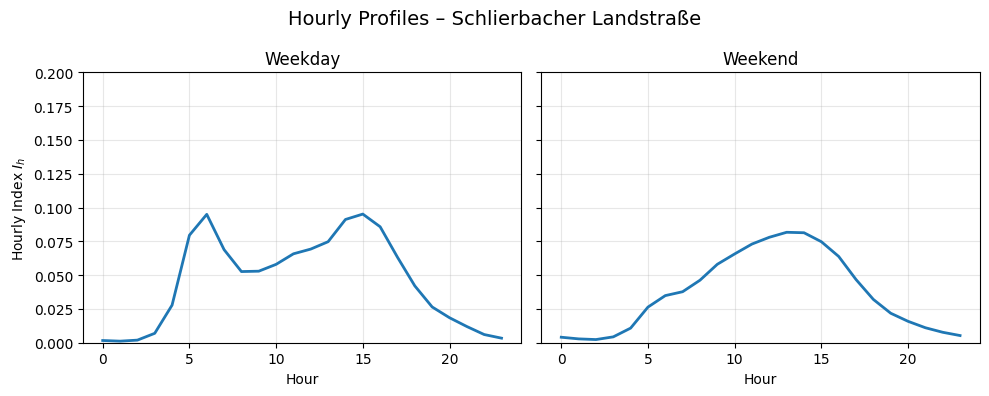

DPI 0.011896288257060014
Diff 0.05016648427257638


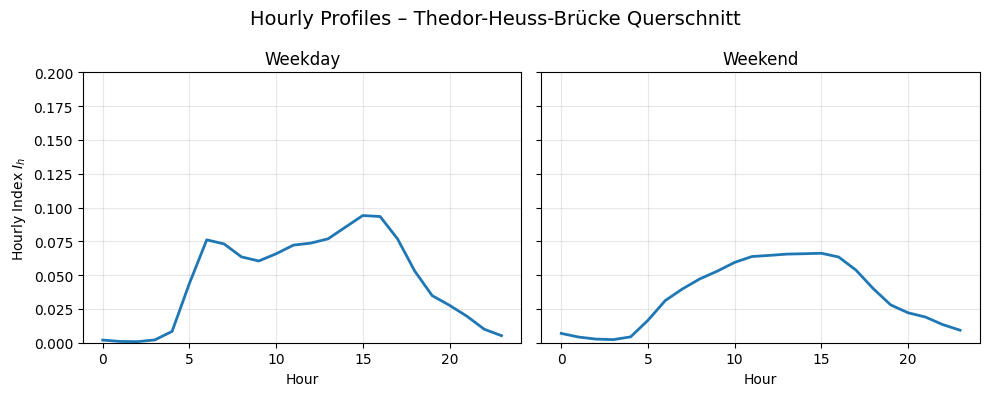

DPI 0.032569828789500814
Diff 0.0767822389262424


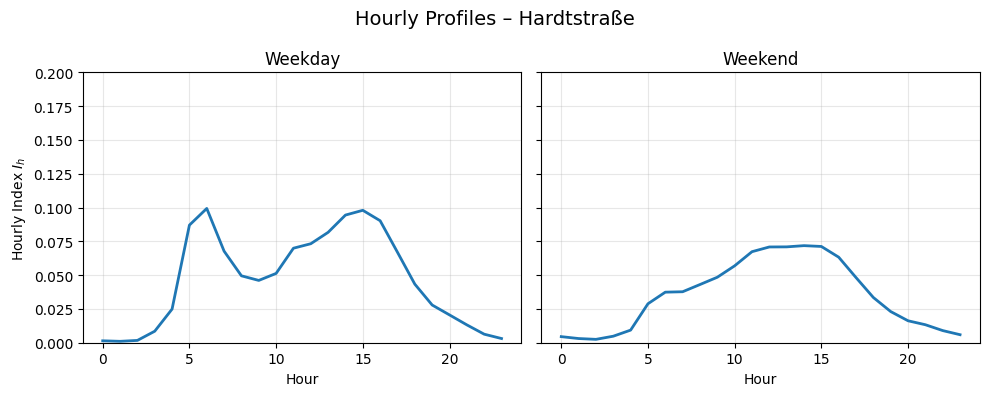

DPI 0.02381604091270358
Diff 0.059758674367229404


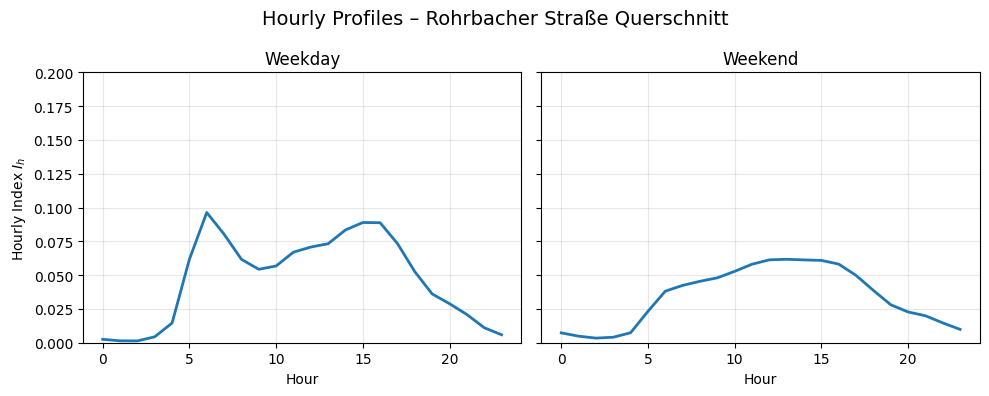

DPI 0.03357903962580346
Diff 0.057858741779439046


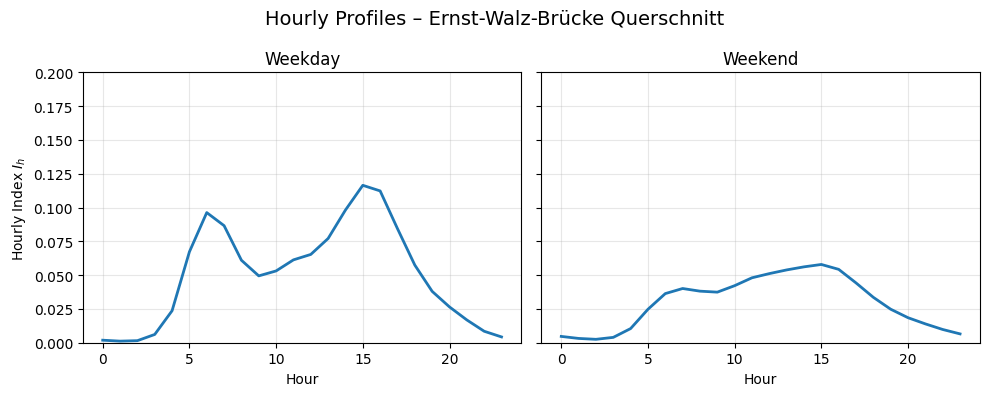

DPI 0.03362876231487876
Diff 0.07286579714888805


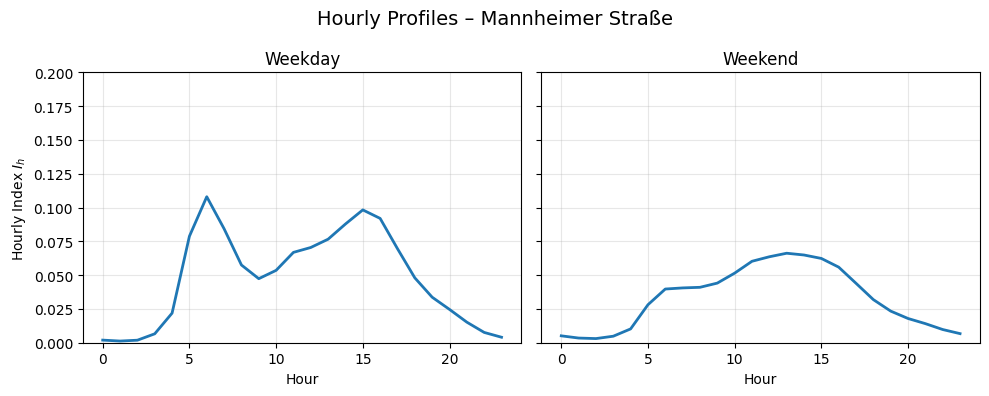

In [6]:
from analysis.visualization.characterisation.plotting import plot_hourly_profiles

for station in dl.get_bicyle_stations():
  plot_hourly_profiles(loader=dl, station_name=station, channel="channels_all", interval=None, ylim=(0, 0.2))

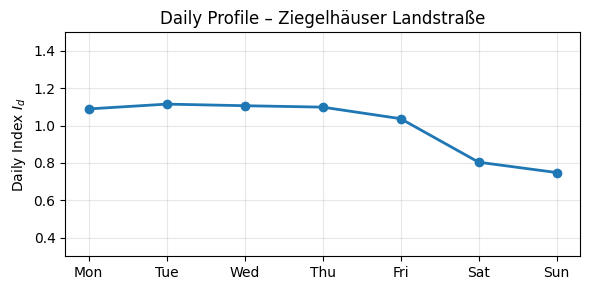

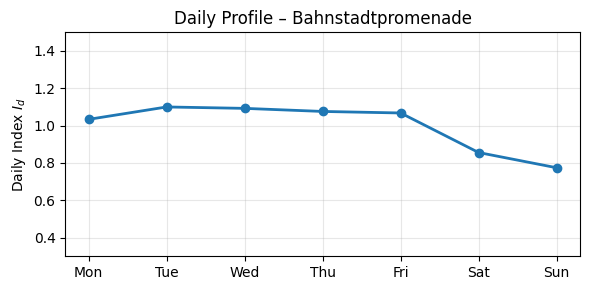

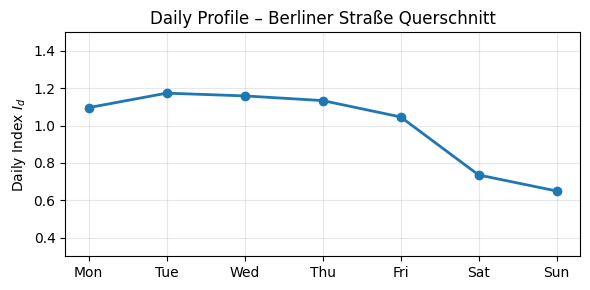

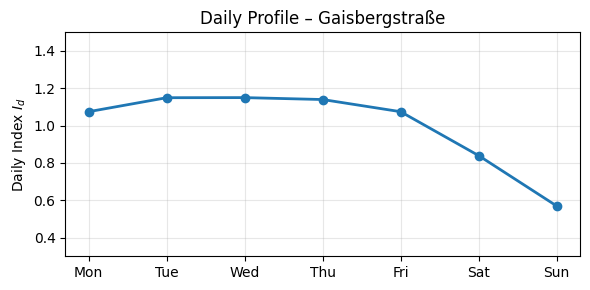

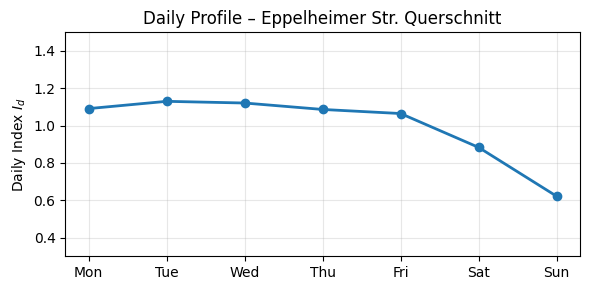

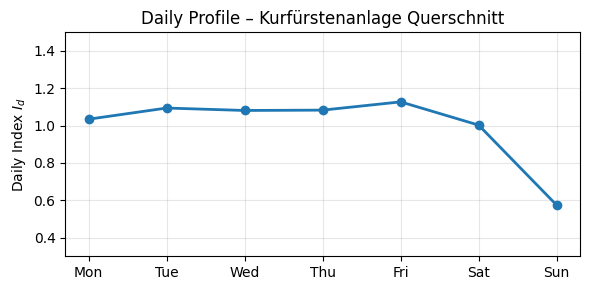

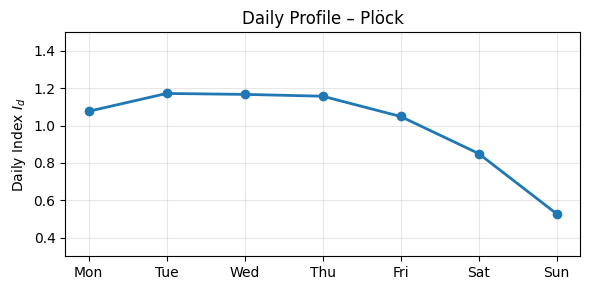

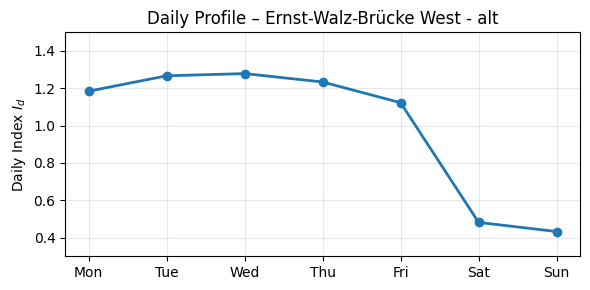

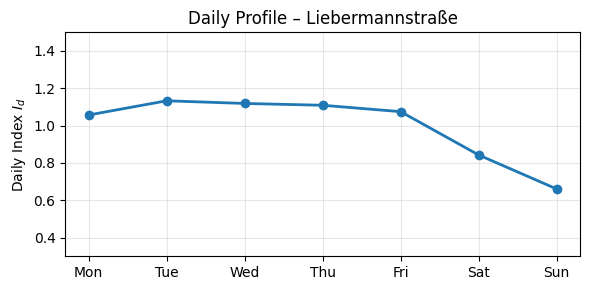

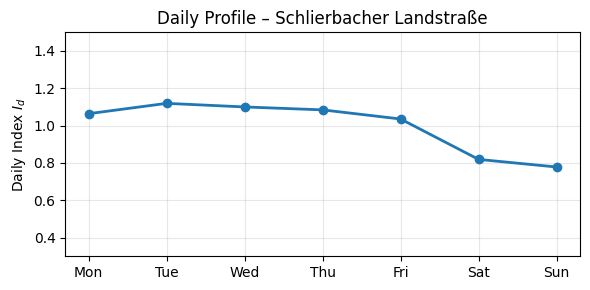

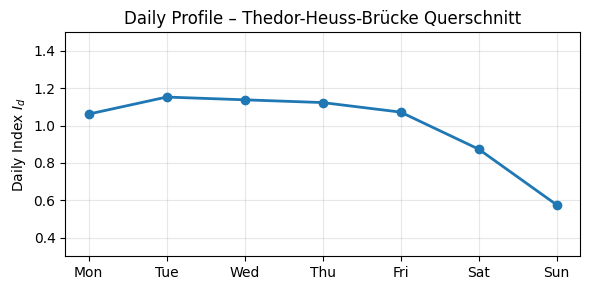

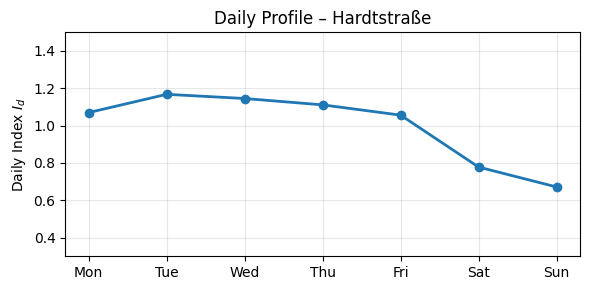

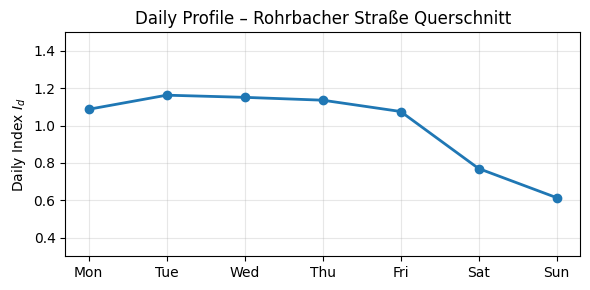

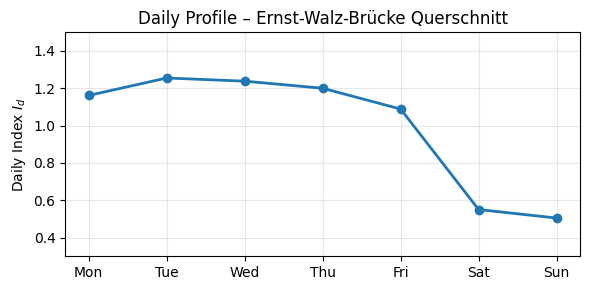

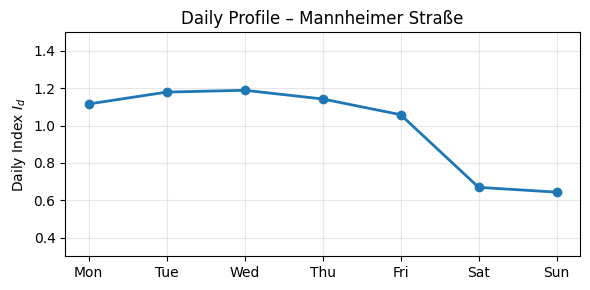

In [7]:
from analysis.visualization.characterisation.plotting import plot_daily_profile

for s in dl.get_bicyle_stations():
    plot_daily_profile(dl, s, ylim=(0.3,1.5))

Warm/Cold Drop: 0.5319309321780678


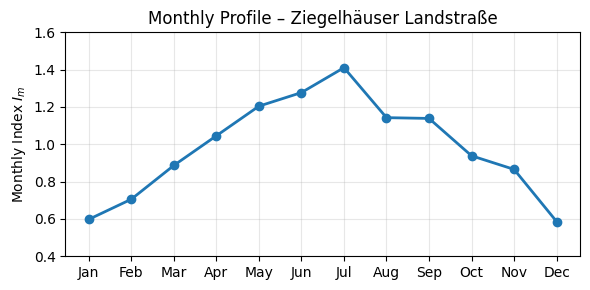

Warm/Cold Drop: 0.4879021592362688


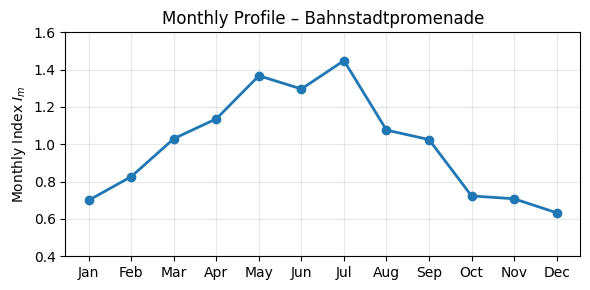

Warm/Cold Drop: 0.3840154469390072


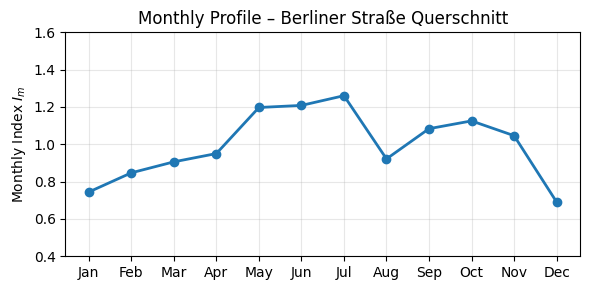

Warm/Cold Drop: 0.3910761192705586


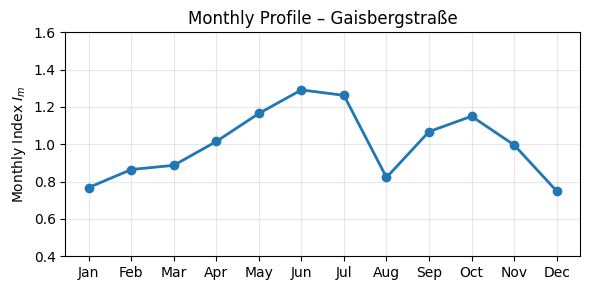

Warm/Cold Drop: 0.4819012514573318


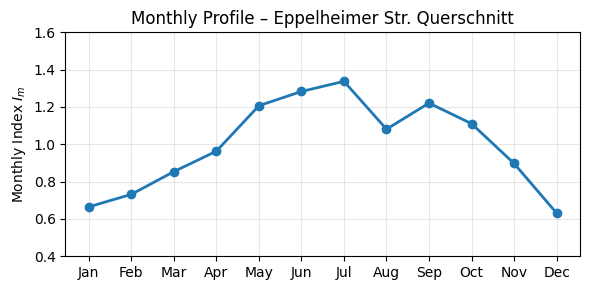

Warm/Cold Drop: 0.4983401424427662


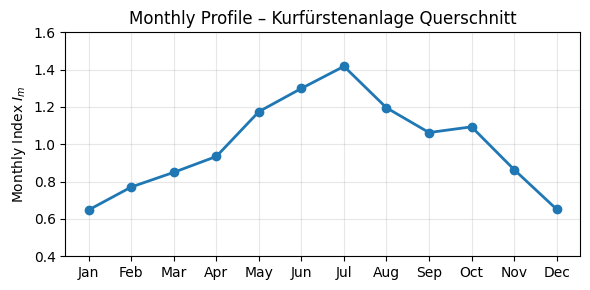

Warm/Cold Drop: 0.33315647436890367


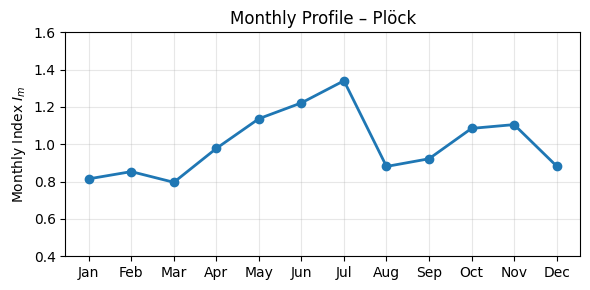

Warm/Cold Drop: 0.4206005371380017


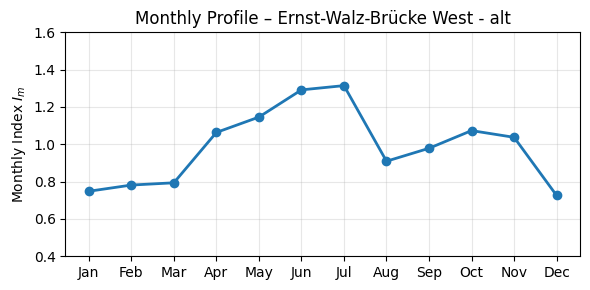

Warm/Cold Drop: 0.41347101731089103


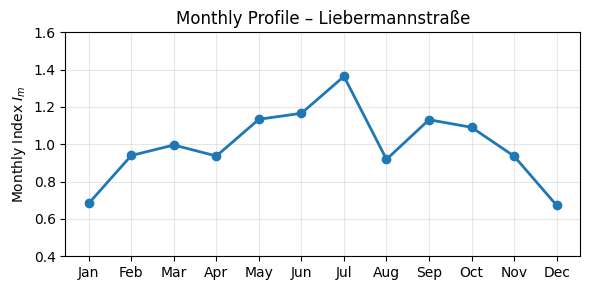

Warm/Cold Drop: 0.6479937219588756


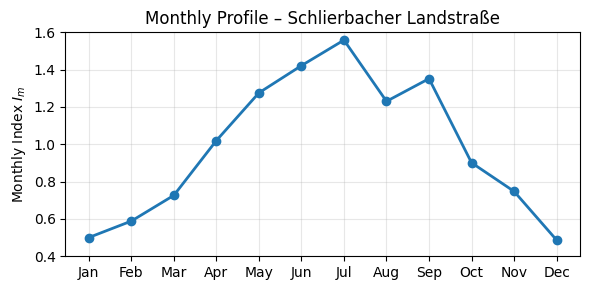

Warm/Cold Drop: 0.35323360586618796


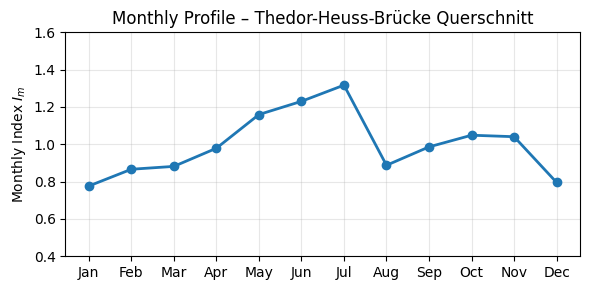

Warm/Cold Drop: 0.4759796219587679


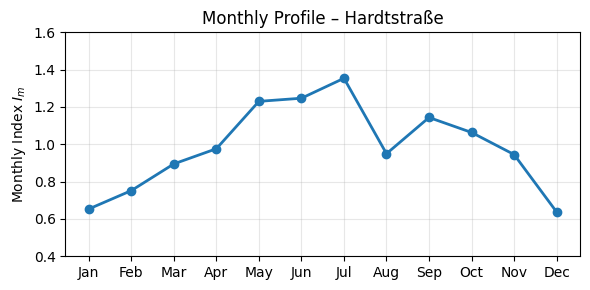

Warm/Cold Drop: 0.32040890712281617


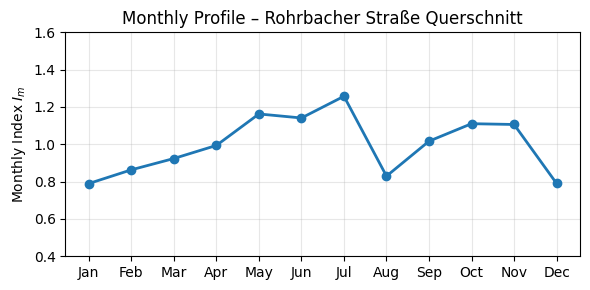

Warm/Cold Drop: 0.3455807469564669


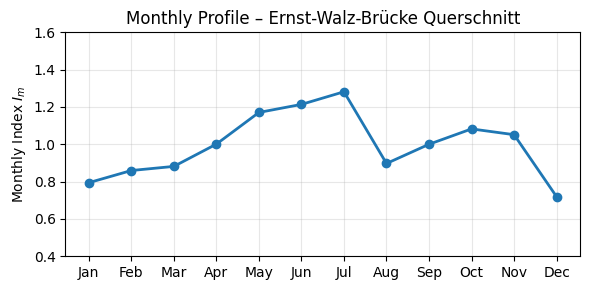

Warm/Cold Drop: 0.5046743222303309


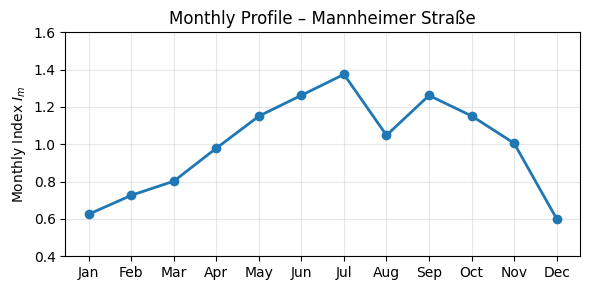

In [8]:
from analysis.visualization.characterisation.plotting import plot_monthly_profile

for s in dl.get_bicyle_stations():
    plot_monthly_profile(dl, s, ylim=(0.4, 1.6))

### Clustering using K-Means
Since we want to classify the stations, we will build a feature vector which holds discriminators between leisure and 
utilitarian counting stations.

As discriminators we can choose the following:

In [9]:
from analysis.visualization.characterisation.features import build_feature_df

X = build_feature_df(dl)
X

station,DPI,Drop_season,Shape_diff_wd_we,valid
str,f64,f64,f64,bool
"""Ziegelhäuser Landstraße""",0.029705,0.531931,0.080283,true
"""Bahnstadtpromenade""",0.03312,0.487902,0.078028,true
"""Berliner Straße Querschnitt""",0.008953,0.384015,0.057203,true
"""Gaisbergstraße""",0.023627,0.391076,0.058062,true
"""Eppelheimer Str. Querschnitt""",0.012723,0.481901,0.05376,true
…,…,…,…,…
"""Thedor-Heuss-Brücke Querschnit…",0.011896,0.353234,0.050166,true
"""Hardtstraße""",0.03257,0.47598,0.076782,true
"""Rohrbacher Straße Querschnitt""",0.023816,0.320409,0.059759,true


Find out which K we should choose to maximize Silhouette score (https://de.wikipedia.org/wiki/Silhouettenkoeffizient).

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_valid = X.filter(pl.col("valid") == True)
X_feat = X_valid.drop(["station", "valid"]).to_numpy()
X_scaled = StandardScaler().fit_transform(X_feat)

best_k = 0
best_score = 0
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=0, n_init=20)
  labels = kmeans.fit_predict(X_scaled)

  score = silhouette_score(X_scaled, labels)
  
  if score > best_score:
    best_k = k
    best_score = max(best_score, score)

  print(f"k={k}: {score:.3f}")

print(f"Best seperation with K = {best_k}")

k=2: 0.479
k=3: 0.399
k=4: 0.378
k=5: 0.369
k=6: 0.346
k=7: 0.343
k=8: 0.353
k=9: 0.325
Best seperation with K = 2


In [11]:
#kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=20)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
labels = kmeans.fit_predict(X_scaled)

X_valid = X_valid.with_columns(pl.Series("cluster_k", labels))

X_k = X.join(
    X_valid.select(["station", "cluster_k"]),
    on="station",
    how="left"
)

X_k.drop(["station", "valid"]).group_by("cluster_k").mean()

cluster_k,DPI,Drop_season,Shape_diff_wd_we
i32,f64,f64,f64
2,0.008258,0.410129,0.045385
1,0.031703,0.529696,0.078654
0,0.023539,0.378227,0.060541


Before we continue let's check the performance of our features to discriminate the data in clusters. 

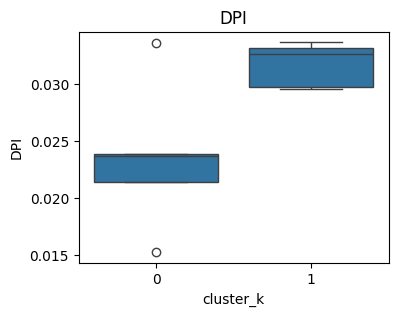

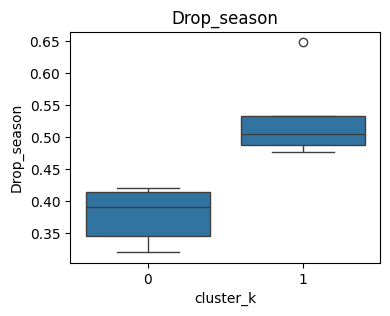

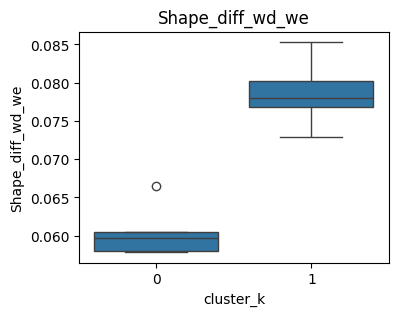

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X_k.filter(pl.col("cluster_k").is_in([0, 1]))

for feat in ["DPI", "Drop_season", "Shape_diff_wd_we"]:
    plt.figure(figsize=(4,3))
    sns.boxplot(data=df, x="cluster_k", y=feat)
    plt.title(feat)
    plt.show()

In [13]:
X_valid.select(["DPI", "Drop_season", "Shape_diff_wd_we"]).corr()

DPI,Drop_season,Shape_diff_wd_we
f64,f64,f64
1.0,0.347306,0.829028
0.347306,1.0,0.603914
0.829028,0.603914,1.0


### PCA
Reducing ```X_scaled``` with to two dimensions.

In [14]:
from sklearn.decomposition import PCA


pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)

X_pca_pl = (
    X_k
    .with_columns([
        pl.Series("PC1", X_pca[:, 0]),
        pl.Series("PC2", X_pca[:, 1]),
    ])
)
X_pca_pl

Explained variance: [0.73615603 0.22461325]


station,DPI,Drop_season,Shape_diff_wd_we,valid,cluster_k,PC1,PC2
str,f64,f64,f64,bool,i32,f64,f64
"""Ziegelhäuser Landstraße""",0.029705,0.531931,0.080283,true,1,1.792586,0.274747
"""Bahnstadtpromenade""",0.03312,0.487902,0.078028,true,1,1.636749,-0.301454
"""Berliner Straße Querschnitt""",0.008953,0.384015,0.057203,true,2,-1.171166,0.147026
"""Gaisbergstraße""",0.023627,0.391076,0.058062,true,0,-0.284028,-0.556558
"""Eppelheimer Str. Querschnitt""",0.012723,0.481901,0.05376,true,2,-0.556825,0.908992
"""Kurfürstenanlage Querschnitt""",0.00394,0.49834,0.034514,true,2,-1.768329,1.685541
"""Plöck""",0.003778,0.333156,0.03128,true,2,-2.8474,0.154168
"""Ernst-Walz-Brücke West - alt""",0.01525,0.420601,0.066512,true,0,-0.220531,0.087408
"""Liebermannstraße""",0.021422,0.413471,0.060512,true,0,-0.175171,-0.250213


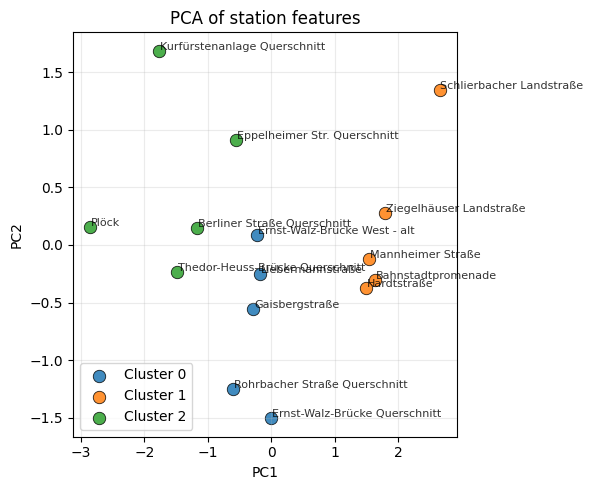

In [15]:
from analysis.visualization.characterisation.plotting import plot_pca_clusters

plot_pca_clusters(
    X_pca_pl,
    cluster_col="cluster_k",
    annotate=True
)

### Robustness of classes
Currently we calculate the classes for the entire counting station data set. This data set has a date range

In [16]:
mins, maxs = [], []

for station in dl.get_bicyle_stations():
  bd = dl.get_bicycle(station_name=station)
  min_date, max_date = bd.date_range()
  mins.append(min_date)
  maxs.append(max_date)

print(f"Date range of all counting station: {min(mins)} - {max(maxs)}")

Date range of all counting station: 2014-05-31 22:00:00+00:00 - 2025-10-31 21:00:00+00:00


Lets check how robust our clustering is if we restrict the time window. We will define different time windows and check how many stations switched cluster type.

In [17]:
interval_16_17 = ("2016-01-01", "2017-01-01")
interval_15_18 = ("2015-01-01", "2018-01-01")
interval_18_21 = ("2018-01-01", "2021-01-01")
interval_21_24 = ("2021-01-01", "2024-01-01")

feature_15_18 = build_feature_df(loader=dl, interval=interval_15_18)
feature_16_17 = build_feature_df(loader=dl, interval=interval_16_17)
feature_18_21 = build_feature_df(loader=dl, interval=interval_18_21)
feature_21_24 = build_feature_df(loader=dl, interval=interval_21_24)

In [18]:
def cluster_interval(loader, interval=None, k=3):
    X = build_feature_df(loader, interval)
    X_valid = X.filter(pl.col("valid") == True)

    X_feat = X_valid.drop(["station", "valid"]).to_numpy()
    X_scaled = StandardScaler().fit_transform(X_feat)

    labels = KMeans(
        n_clusters=k, random_state=0, n_init=20
    ).fit_predict(X_scaled)

    X_valid = X_valid.with_columns(pl.Series("cluster", labels))

    return X.join(
        X_valid.select(["station", "cluster"]),
        on="station",
        how="left"
    )

In [19]:
C_full   = cluster_interval(dl, interval=None)
C_15_18  = cluster_interval(dl, interval_15_18)
C_16_17  = cluster_interval(dl, interval_16_17)
C_18_21  = cluster_interval(dl, interval_18_21)
C_21_24  = cluster_interval(dl, interval_21_24)

```cluster_ari``` checks for all stations if the cluster in the first clustering is equal to the cluster in the second clustering. 

In [20]:
from sklearn.metrics import adjusted_rand_score

def cluster_ari(df_a, df_b):
    joined = (
        df_a.select(["station", "cluster"])
        .join(df_b.select(["station", "cluster"]), on="station")
        .drop_nulls()
    )
    return adjusted_rand_score(
        joined["cluster"].to_numpy(),
        joined["cluster_right"].to_numpy()
    )


In [21]:
for interval in [C_15_18, C_16_17, C_18_21, C_21_24]:
  score = cluster_ari(C_full, interval)
  print(f"Cluster Consistency Score {score:.3f}")

Cluster Consistency Score 1.000
Cluster Consistency Score 1.000
Cluster Consistency Score 1.000
Cluster Consistency Score 0.785


Cluster changes occure quit quickly with our classification. Instead of hard clustering we could give a probability for a station to be in a certain cluster. We build a cumulative cluster timeseries and calculate
$$
\begin{align*}
P(Cluster\;c\;|\;Station\;s) = \frac{\text{\# Classification Cluster c}}{\text{Total number of classifications}}
\end{align*}
$$

In [22]:
from analysis.visualization.characterisation.clustering import cumulative_cluster_timeseries_aligned

C_cum_aligned = cumulative_cluster_timeseries_aligned(
    dl, k=3, start="2016-01-01", end="2024-01-01"
)
C_cum_aligned


cluster_probs = (
    C_cum_aligned
    .group_by(["station", "cluster"])
    .agg(pl.len().alias("n"))
    .with_columns(
        (pl.col("n") / pl.col("n").sum().over("station"))
        .alias("probability")
    )
    .sort(["station", "cluster"])
)

cluster_probs

station,cluster,n,probability
str,i32,u32,f64
"""Bahnstadtpromenade""",0,5,0.116279
"""Bahnstadtpromenade""",2,38,0.883721
"""Berliner Straße Querschnitt""",1,43,1.0
"""Eppelheimer Str. Querschnitt""",1,43,1.0
"""Ernst-Walz-Brücke Querschnitt""",0,91,1.0
"""Ernst-Walz-Brücke West - alt""",0,91,1.0
"""Gaisbergstraße""",0,91,1.0
"""Hardtstraße""",0,5,0.116279
"""Hardtstraße""",2,38,0.883721


The clusters seem to be mostly stable.

Lets look how this looks on the map

In [23]:
from analysis.visualization.characterisation.map import (bicycle_station_cluster_map, add_cluster_legend)

m_k3 = bicycle_station_cluster_map(loader=dl, cluster_probs=cluster_probs)
add_cluster_legend(m_k3)
m_k3

## Cluster Interpretation
Resulting from k-Means clustering we get the following clusters for the entire time series.

In [24]:
top_per_cluster = (
    cluster_probs
    .sort("probability", descending=True)
    .group_by("cluster")
    .head(20)  
)

top_per_cluster

cluster,station,n,probability
i32,str,u32,f64
0,"""Ernst-Walz-Brücke Querschnitt""",91,1.0
0,"""Ernst-Walz-Brücke West - alt""",91,1.0
0,"""Gaisbergstraße""",91,1.0
0,"""Liebermannstraße""",55,1.0
0,"""Rohrbacher Straße Querschnitt""",55,1.0
0,"""Bahnstadtpromenade""",5,0.116279
0,"""Hardtstraße""",5,0.116279
0,"""Thedor-Heuss-Brücke Querschnit…",1,0.016129
2,"""Mannheimer Straße""",91,1.0


In [25]:
from analysis.visualization.characterisation.clustering import (compute_cluster_means, zscore_columns, compute_utilitarian_score, label_clusters_by_score)

FEATURES = ["DPI", "Shape_diff_wd_we", "Drop_season"]

cluster_means = compute_cluster_means(X_k, FEATURES)
cluster_means = zscore_columns(cluster_means, FEATURES)
cluster_means = compute_utilitarian_score(cluster_means)
labels = label_clusters_by_score(cluster_means)
labels

{2: 'leisure', 0: 'utilitarian', 1: 'mixed'}

In [26]:
from analysis.visualization.characterisation.clustering import (label_cluster_probabilities, add_utilitarian_score, select_top_stations_per_usage)


cluster_probs_labeled = label_cluster_probabilities(cluster_probs, labels)
X_scored = add_utilitarian_score(X_k)

top_stations = select_top_stations_per_usage(
    cluster_probs_labeled,
    X_scored,
    n=2
)

top_stations

usage_type,station,cluster,n,probability,utilitarian_score,ranking_score
str,str,i32,u32,f64,f64,f64
"""leisure""","""Schlierbacher Landstraße""",2,55,1.0,-0.533189,0.533189
"""leisure""","""Ziegelhäuser Landstraße""",2,55,1.0,-0.421943,0.421943
"""mixed""","""Berliner Straße Querschnitt""",1,43,1.0,-0.317859,0.0
"""mixed""","""Eppelheimer Str. Querschnitt""",1,43,1.0,-0.415419,0.0
"""utilitarian""","""Rohrbacher Straße Querschnitt""",0,55,1.0,-0.236834,-0.236834
"""utilitarian""","""Ernst-Walz-Brücke Querschnitt""",0,91,1.0,-0.254143,-0.254143


## Cluster Interpretation

Based on the cumulative, probabilistic clustering over multiple time windows, the station classes should be interpreted softly rather than as fixed labels. Stations are best described by their dominant cluster probability instead of a single hard assignment.